<a href="https://colab.research.google.com/github/karri-ten/Test-to-image-generation/blob/main/custom_text_image_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Text-to-Image Generation for Cats and Dogs
This notebook demonstrates how to build a simple custom Text-to-Image generator for cats and dogs by prompting a pretrained Stable Diffusion model.

## Install Dependencies

In [1]:
!pip install diffusers transformers accelerate torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.9 MB/s eta 0:00:00


## Import Libraries

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display

## Load the Stable Diffusion Pipeline

In [3]:
# Load a Stable Diffusion model (first run may download weights)
model_id = 'runwayml/stable-diffusion-v1-5'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.enable_attention_slicing()

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Define the Generation Function

In [ ]:
def generate_pet_image(prompt: str, guidance: str = 'cat or dog', num_inference_steps: int = 50, guidance_scale: float = 7.5):
    '''Generate an image using Stable Diffusion with a pet-specific prompt.'''
    full_prompt = f"{prompt}, {guidance}, photorealistic"
    result = pipe(full_prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale)
    return result.images[0]

## Generate Sample Cat and Dog Images

  0%|          | 0/50 [00:00<?, ?it/s]

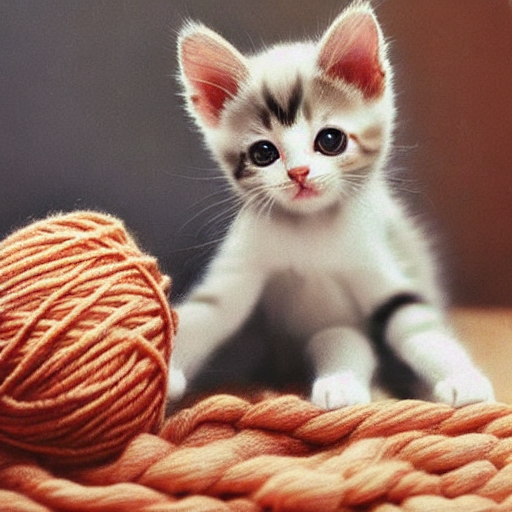

  0%|          | 0/50 [00:00<?, ?it/s]

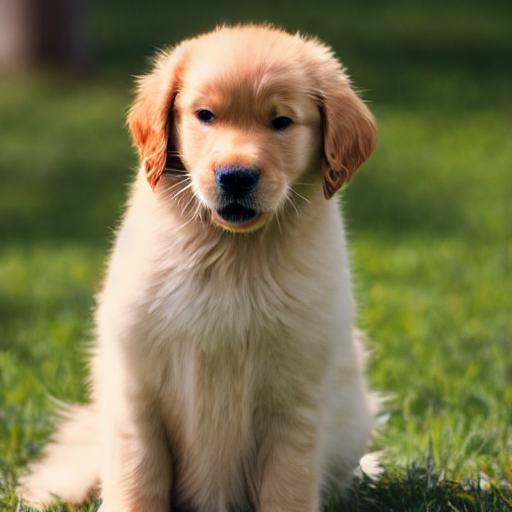

In [ ]:
# Generate and display a cat image
cat_image = generate_pet_image('a cute kitten playing with yarn')
display(cat_image)

# Generate and display a dog image
dog_image = generate_pet_image('a golden retriever puppy in a sunny park')
display(dog_image)

## Save Generated Images

In [ ]:
import os
output_dir = './generated_pets'
os.makedirs(output_dir, exist_ok=True)
cat_image.save(os.path.join(output_dir, 'kitten.png'))
dog_image.save(os.path.join(output_dir, 'puppy.png'))
print(f'Saved kitten.png and puppy.png to {output_dir}')

## Next Steps
- Try different cat or dog breeds in the prompt.
- Adjust `num_inference_steps` and `guidance_scale` for quality vs. speed tradeoff.
- Integrate this into a web app or batch script for bulk generation.